# Project Overview:



**1. Data Aquisition**

**2. Data Introduction**

**3. Business Question/TasK**

**4. Data Cleaning**

**5. Data exploration/vasulization**

**6. Data Modeling**

**7. Models Evaluation**

**8. Top factors Impacting Pricing**

**9. Apply the Model to the Real World Situation**

In [ ]:
# Packages
import pandas as pd
import numpy as np
from sklearn.tree import plot_tree
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
import statsmodels.api as sm
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, r2_score, mean_squared_error, mean_absolute_error

# 1. Data Aquisition

Data resourse:
https://www.kaggle.com/datasets/austinreese/craigslist-carstrucks-data/data

In [ ]:
# Pretty large file (> 1GB), will take about 1min to load.
df = pd.read_csv('https://msis510-datasets-public-sdy.s3.us-west-2.amazonaws.com/vehicles.csv')

# 2. Data Introduction



The dataset is a comprehensive collection of used vehicle listings from Craigslist across the United States. It has been compiled by scraping the platform every few months and contains detailed information about the car sales posted there. There are 426880 row, 26 columns and 9443544 non-null entities in the dataset. Here's an overview of the types of information included in the dataset, represented by each column:

**id**: Unique identifier for the listing.

**url**: URL of the vehicle listing on Craigslist.

**region**: Geographic region of the listing.

**region_url**: Craigslist URL for the region.

**price**: The listed price of the car

**year**: Year of the vehicle manufacture.

**manufacturer**: Vehicle manufacturer.

**model**: Specific model of the vehicle.

**condition**: Condition of the vehicle (e.g., new, used, etc.).

**cylinders**: Number of cylinders in the vehicle's engine.

**fuel**: Type of fuel the vehicle uses.

**odometer**: Mileage on the vehicle.

**title_status**: Legal status of the vehicle's title.

**transmission**: Type of vehicle transmission.

**VIN**: Vehicle Identification Number.

**drive**: Type of drivetrain.

**size**: Size category of the vehicle.

**type**: Type of vehicle body.

**paint_color**: Color of the vehicle.

**image_url**: URL of the vehicle's image.

**description**: Description provided in the listing.

**county**: County where the vehicle is located (often missing).

**state**: State where the vehicle is listed. lat: Latitude coordinate for the listing location.

**long**: Longitude coordinate for the listing location.

**posting_date**: Date and time when the listing was posted.

In [ ]:
df.shape

(426880, 26)

In [ ]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,...,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
0,7222695916,https://prescott.craigslist.org/cto/d/prescott...,prescott,https://prescott.craigslist.org,6000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,az,NaN,NaN,NaN
1,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
2,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
3,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
4,7210384030,https://greensboro.craigslist.org/cto/d/trinit...,greensboro,https://greensboro.craigslist.org,4900,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,nc,NaN,NaN,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   url           426880 non-null  object 
 2   region        426880 non-null  object 
 3   region_url    426880 non-null  object 
 4   price         426880 non-null  int64  
 5   year          425675 non-null  float64
 6   manufacturer  409234 non-null  object 
 7   model         421603 non-null  object 
 8   condition     252776 non-null  object 
 9   cylinders     249202 non-null  object 
 10  fuel          423867 non-null  object 
 11  odometer      422480 non-null  float64
 12  title_status  418638 non-null  object 
 13  transmission  424324 non-null  object 
 14  VIN           265838 non-null  object 
 15  drive         296313 non-null  object 
 16  size          120519 non-null  object 
 17  type          334022 non-null  object 
 18  pain

# 3. Business Question/Task

**3.1 Market Analysis and Trend Prediction**:

How can machine learning be used to analyze current market trends in used car prices, and predict future trends based on historical data, thereby aiding investors and dealerships in making informed decisions?

**3.2 Personalized Price Recommendations**:

Can a machine learning model provide personalized price recommendations for individual sellers based on their car's characteristics, location, and current market conditions, to optimize their chances of a successful and profitable sale?

**3.3 Dynamic Pricing for Online Platforms:**

How can an algorithm dynamically adjust car listing prices on an online platform, based on real-time market data and individual car features, to enhance sales and customer satisfaction?

**3.4 Identifying Under- or Overpriced Listings:**

Can a predictive model be designed to flag potentially under- or overpriced car listings for further review, helping online marketplaces maintain pricing integrity and protect consumers?

# 4. Data Cleaning

In [ ]:
#check null values portion for each column (in % of total number of rows)
df.isna().mean()*100

id                0.000000
url               0.000000
region            0.000000
region_url        0.000000
price             0.000000
year              0.282281
manufacturer      4.133714
model             1.236179
condition        40.785232
cylinders        41.622470
fuel              0.705819
odometer          1.030735
title_status      1.930753
transmission      0.598763
VIN              37.725356
drive            30.586347
size             71.767476
type             21.752717
paint_color      30.501078
image_url         0.015930
description       0.016398
county          100.000000
state             0.000000
lat               1.534155
long              1.534155
posting_date      0.015930
dtype: float64

**4.1. Remove duplicates**

In [ ]:
df.duplicated().sum()

0

There are no duplicates in the dataset.

**4.2.Drop Unnecessary Columns**

Based on above observation drop the Uniqueness Columns like id, url,vin and missing data like country and size which with 72% missing value.

In [ ]:
df=df.drop(columns=["id","url","region", "region_url","county", "size","VIN"],axis=1)

**4.3 Remove some null value rows**

By removing null value rows of some important feature, to improve the quality of your data by focusing on more reliable and complete listings, which can lead to a more accurate machine learning model.

I choose 'image_url', 'odometer', 'transmission', 'title_status', 'fuel', 'manufacturer', 'model', 'year' these rows to remove null values, because of they small partions of null values, and I think these features are important when sell used car. Without these important features may means fake information or not seriously deal.

In [ ]:
columns_to_check = ['image_url', 'odometer', 'transmission', 'title_status', 'fuel', 'manufacturer', 'model', 'year', 'description']
# checking the share of null values in these columns
df[columns_to_check].isna().mean()

image_url       0.0
odometer        0.0
transmission    0.0
title_status    0.0
fuel            0.0
manufacturer    0.0
model           0.0
year            0.0
description     0.0
dtype: float64

In [ ]:
# Dropping rows where any of these columns have null value
df = df.dropna(subset=columns_to_check)

# Displaying the shape of the dataset after removal of rows with missing values
df.shape

(389602, 19)

In [ ]:
# REMOVE THIS CELL before submission (it is for reference). We removed about 9% of rows so far
(426880 - 389602)/426880

0.08732664917541229

**4.5. Handle missing values for numerical and categorical separately.**

a) For numeric columns, fill missing values with the median.

b) Replacing missing values in categorical columns with the text 'missing'

In [ ]:
df['cylinders'].value_counts()

6 cylinders     86753
4 cylinders     71113
8 cylinders     66131
5 cylinders      1524
10 cylinders     1302
other             800
3 cylinders       520
12 cylinders      108
Name: cylinders, dtype: int64

In [ ]:
df['cylinders'].isna().mean()

0.4141431512158562

In [ ]:
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns
for col in numerical_cols:
  df[col].fillna(df[col].median(), inplace=True)
for col in categorical_cols:
  df[col] = df[col].fillna('missing')

**4.6 Data Type Conversion**

a) Convert 'year' to datetime (just the year part as it doesn't include a full date)

b)Convert 'posting_date' to datetime and handle errors by coercing them into NaT

c) Adjust to handle timezone-aware datetime objects

In [ ]:
df['year'] = pd.to_datetime(df['year'], format='%Y', errors='coerce').dt.year

In [ ]:
df['posting_date'] = pd.to_datetime(df['posting_date'], utc=True, errors='coerce')

**4.5 Categorical data cleaning**

a) calculate the number of subcategories for each category

b) select the large number catogories to clean ( region, manufactuerer, model)

c) check the final subcategories number

**This method assumes that the most common categories in the dataset are the most informative, and that less common categories may not contribute meaningfully to the model or may be too dispersed, potentially introducing noise into the model. By grouping the less common categories into a unified 'others' category, it can help the model to learn and generalize better.**

In [ ]:
#calculate the original number of subcategories of each category
categorical_features = [
    'manufacturer', 'model', 'condition', 'cylinders',
    'fuel', 'title_status', 'transmission', 'drive', 'type',
    'paint_color', 'state'
]
for feature in categorical_features:
    num_subcategories = df[feature].nunique()
    print(f"The number of subcategories for {feature} is: {num_subcategories}")

The number of subcategories for manufacturer is: 41
The number of subcategories for model is: 21866
The number of subcategories for condition is: 7
The number of subcategories for cylinders is: 9
The number of subcategories for fuel is: 5
The number of subcategories for title_status is: 6
The number of subcategories for transmission is: 3
The number of subcategories for drive is: 4
The number of subcategories for type is: 14
The number of subcategories for paint_color is: 13
The number of subcategories for state is: 51


In [ ]:
# select the large number catogories to clean (manufactuerer, model)
top_manufacturers = df['manufacturer'].value_counts().head(20).index
df['manufacturer'] = df['manufacturer'].apply(lambda x: x if x in top_manufacturers else 'others')

top_models = df['model'].value_counts().head(50).index
df['model'] = df['model'].apply(lambda x: x if x in top_models else 'others')

In [ ]:
# After processing the DataFrame as per the previous steps
for feature in categorical_features:
    num_subcategories = df[feature].nunique()
    print(f"The number of subcategories for {feature} is: {num_subcategories}")

The number of subcategories for manufacturer is: 21
The number of subcategories for model is: 51
The number of subcategories for condition is: 7
The number of subcategories for cylinders is: 9
The number of subcategories for fuel is: 5
The number of subcategories for title_status is: 6
The number of subcategories for transmission is: 3
The number of subcategories for drive is: 4
The number of subcategories for type is: 14
The number of subcategories for paint_color is: 13
The number of subcategories for state is: 51


**4.6 Remove outliers**

Our dataset have lots of outliers. Outliers reduces the accuracy of a model. We have to detect outliers and remove them.

a)To remove outliers from the 'price' column, we can use the IQR (Interquartile Range) method.

b) To remove outliers from the 'odometer' column, we can use the IQR (Interquartile Range) method.

In [ ]:
# First, we'll calculate Q1 (25th percentile) and Q3 (75th percentile) for the 'price'.
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define outliers as any values outside of Q1 - 1.5*IQR and Q3 + 1.5*IQR
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Remove outliers from the dataset
df = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

In [ ]:
odometer_percentile75 = df['odometer'].quantile(0.75)
odometer_percentile25 = df['odometer'].quantile(0.25)
odometer_iqr = odometer_percentile75 - odometer_percentile25
odometer_upper_limit = odometer_percentile75 + 1.5 * odometer_iqr
odometer_lower_limit = df['odometer'].quantile(0.05)

**4.7 Data validation**

a) Ensuring 'year' is within a realistic range (e.g., 1900 - 2023)

b) Ensuring 'price' is non-negative

In [ ]:
df = df[(df['year'] >= 1900) & (df['year'] <= 2023)]
df = df[df['price'] >= 0]

# 5. Feature engneering

5.1 Converting odometer column from float to integer

In [ ]:
df['odometer'] = df['odometer'].fillna(0).astype(int)
df['year'] = df['year'].astype(int)

5.2 Converting year column to car age to act as a metrics of pricing

In [ ]:
df['car_age'] = 2021 - df['year']
df.drop(['year'], axis = 1, inplace = True)

5.3 Converting description text column to words counting column to act as a metrics of pricing

In [ ]:
df['description_word_count'] = df['description'].astype(str).apply(lambda x: len(x.split()))
df.drop(['description'], axis = 1, inplace = True)

In [ ]:
# All set! Now let's see the cleaned dataset
df.head()

,price,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,type,paint_color,image_url,state,lat,long,posting_date,car_age,description_word_count
27,33590,gmc,others,good,8 cylinders,gas,57923,clean,other,missing,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.590,-85.4800,2021-05-04 17:31:18+00:00,7,681
28,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,missing,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.590,-85.4800,2021-05-04 17:31:08+00:00,11,692
29,39590,chevrolet,others,good,8 cylinders,gas,19160,clean,other,missing,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,al,32.590,-85.4800,2021-05-04 17:31:25+00:00,1,690
30,30990,toyota,others,good,8 cylinders,gas,41124,clean,other,missing,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,al,32.590,-85.4800,2021-05-04 15:41:31+00:00,4,710
31,15000,ford,others,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,al,32.592,-85.5189,2021-05-03 19:02:03+00:00,8,12


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 382946 entries, 27 to 426879
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype              
---  ------                  --------------   -----              
 0   price                   382946 non-null  int64              
 1   manufacturer            382946 non-null  object             
 2   model                   382946 non-null  object             
 3   condition               382946 non-null  object             
 4   cylinders               382946 non-null  object             
 5   fuel                    382946 non-null  object             
 6   odometer                382946 non-null  int64              
 7   title_status            382946 non-null  object             
 8   transmission            382946 non-null  object             
 9   drive                   382946 non-null  object             
 10  type                    382946 non-null  object             
 11  paint_color             3

**Download the 10% of the cleaned data to model(origianl data is too big)**

In [ ]:
sampled_data = df.sample(frac=0.1, random_state=1)
sampled_data.to_csv('sampled_usedcar.csv', index=False)
from google.colab import files
files.download('sampled_usedcar.csv')

# 6.Data Exploration

**5.1. Distribution of Vehicle Price**

The histogram shows the distribution of vehicle prices, with a majority of the vehicles concentrated in the lower price range.

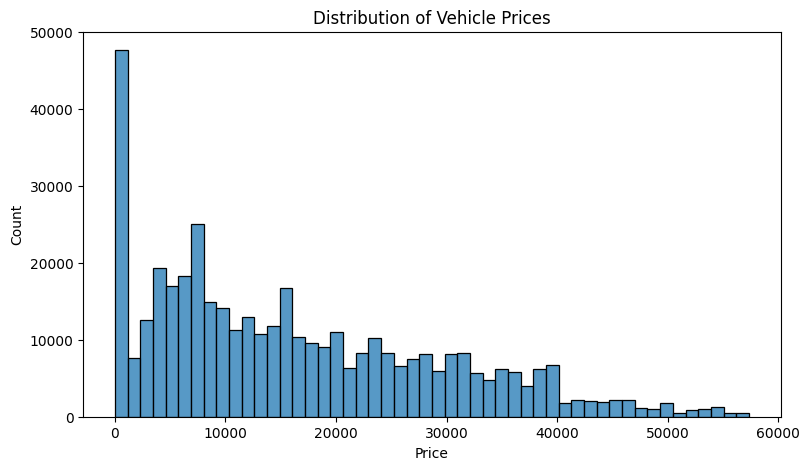

In [ ]:
plt.figure(figsize=(9, 5))
sns.histplot(df['price'], kde=False, bins=50)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

5.2 **Price Distribution by Car Age**

Using a scatter plot to show individual data points and a trend line.

The scatter plot and trend line show how the prices of vehicles change by year, indicating the general depreciation of vehicle value over time.

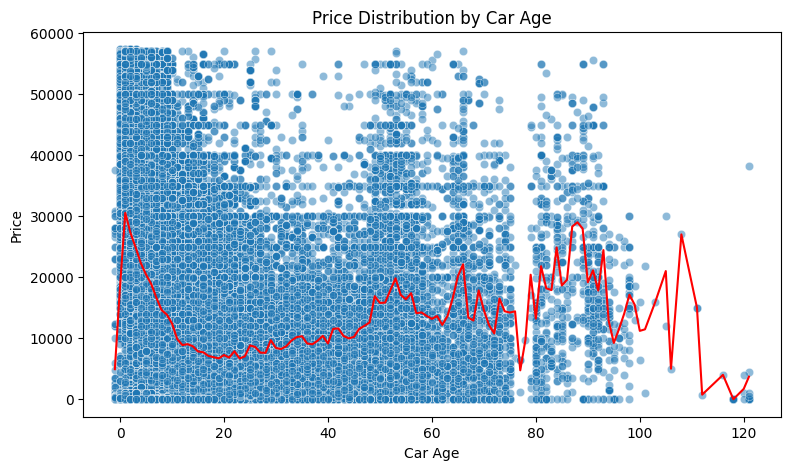

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='car_age', y='price', alpha=0.5)
sns.lineplot(data=df.groupby('car_age')['price'].mean().reset_index(), x='car_age', y='price', color='red')
plt.title('Price Distribution by Car Age')
plt.xlabel('Car Age')
plt.ylabel('Price')
plt.show()

**5.3 Price Distribution with Cylinder Count**

We'll only consider the most common cylinder counts to keep the visualization readable.

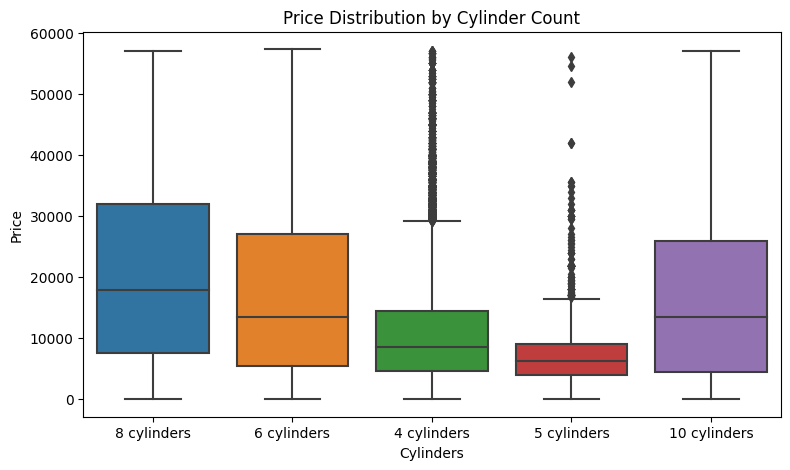

In [ ]:
common_cylinders = df['cylinders'].value_counts().head(5).index
filtered_by_cylinders = df[df['cylinders'].isin(common_cylinders)]
plt.figure(figsize=(9, 5))
sns.boxplot(data=filtered_by_cylinders, x='cylinders', y='price')
plt.title('Price Distribution by Cylinder Count')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.show()

**5.4 Price Distribution by Odometer Reading**

We will create a scatter plot to visualize the relationship between odometer readings and price.


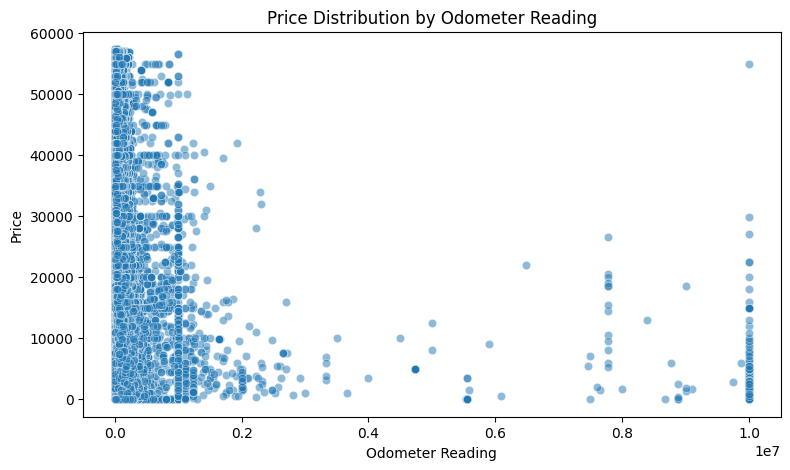

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(data=df, x='odometer', y='price', alpha=0.5)
plt.title('Price Distribution by Odometer Reading')
plt.xlabel('Odometer Reading')
plt.ylabel('Price')
plt.show()

**5.5 Price and Vehicle Color**

Since there are many possible colors, we'll focus on the top 10 most common colors.

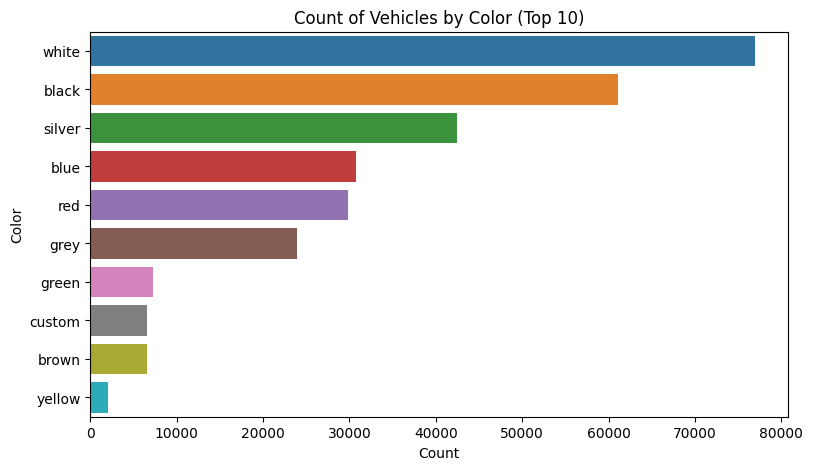

In [ ]:
# Vehicle color distribution
top_colors = df['paint_color'].value_counts().head(10).index
filtered_by_color = df[df['paint_color'].isin(top_colors)]
plt.figure(figsize=(9, 5))
sns.countplot(data=filtered_by_color, y='paint_color', order=top_colors)
plt.title('Count of Vehicles by Color (Top 10)')
plt.xlabel('Count')
plt.ylabel('Color')
plt.show()

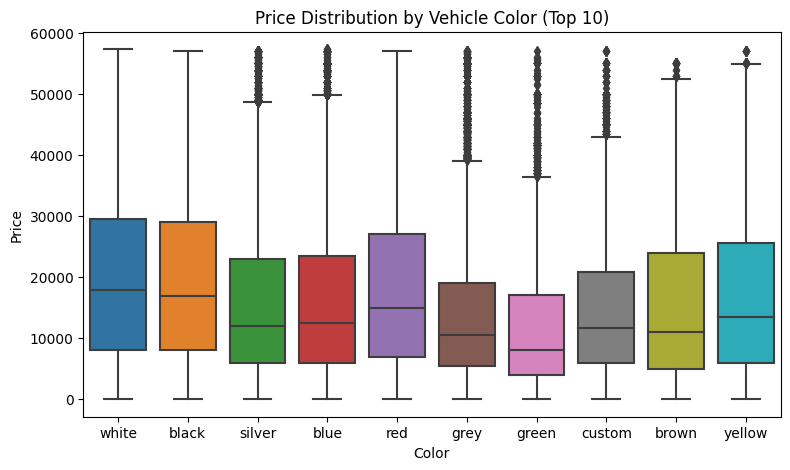

In [ ]:
#Vihicle colors and price
plt.figure(figsize=(9, 5))
sns.boxplot(data=filtered_by_color, x='paint_color', y='price', order=top_colors)
plt.title('Price Distribution by Vehicle Color (Top 10)')
plt.xlabel('Color')
plt.ylabel('Price')
plt.show()

**5.6 Price Distribution between Top 5 Manufacturers**

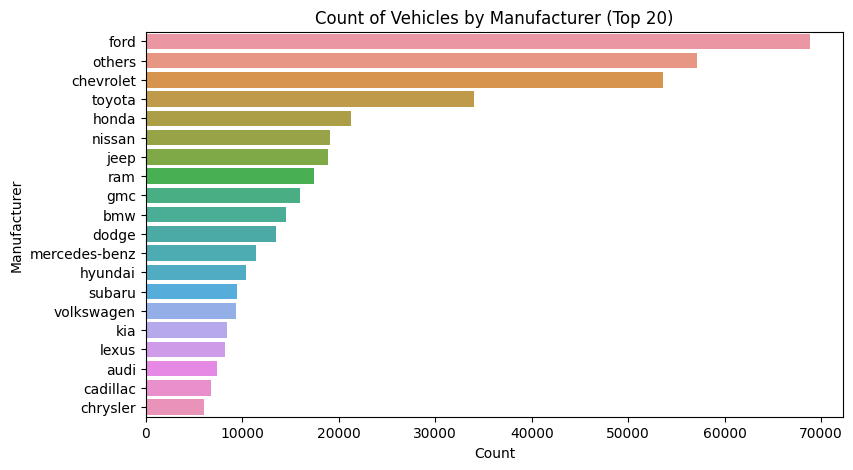

In [ ]:
count_by_manufacturer = df['manufacturer'].value_counts().reset_index()
count_by_manufacturer.columns = ['manufacturer', 'count']

# Count of Vehicles by Manufacturer (Top 20)
plt.figure(figsize=(9, 5))
sns.barplot(data=count_by_manufacturer.head(20), x='count', y='manufacturer')
plt.title('Count of Vehicles by Manufacturer (Top 20)')
plt.xlabel('Count')
plt.ylabel('Manufacturer')
plt.show()

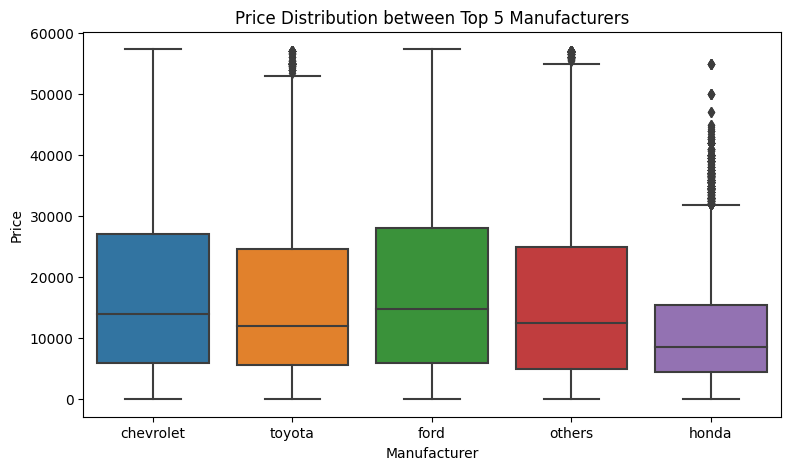

In [ ]:
# Preparing data for the next visualization: Price Distribution between Top 5 Manufacturers
top_manufacturers_list = count_by_manufacturer.head(5)['manufacturer'].tolist()
df = df[df['manufacturer'].isin(top_manufacturers_list)]

# Price Distribution between Top 5 Manufacturers
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='manufacturer', y='price')
plt.title('Price Distribution between Top 5 Manufacturers')
plt.xlabel('Manufacturer')
plt.ylabel('Price')
plt.show()

**5.7 Price Distribution by Vehicle Condition**

It reveals how the condition of a vehicle impacts its price, with new and like-new vehicles generally fetching higher prices.

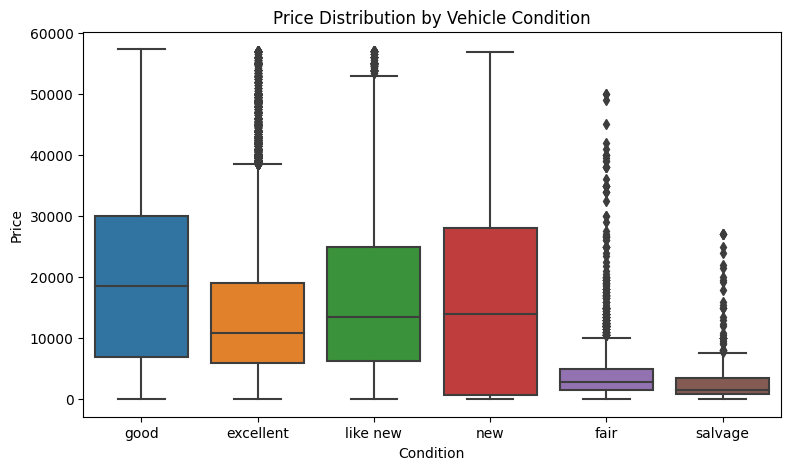

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='condition', y='price')
plt.title('Price Distribution by Vehicle Condition')
plt.xlabel('Condition')
plt.ylabel('Price')
plt.show()

**5.8 Price Distribution by Fuel Type**

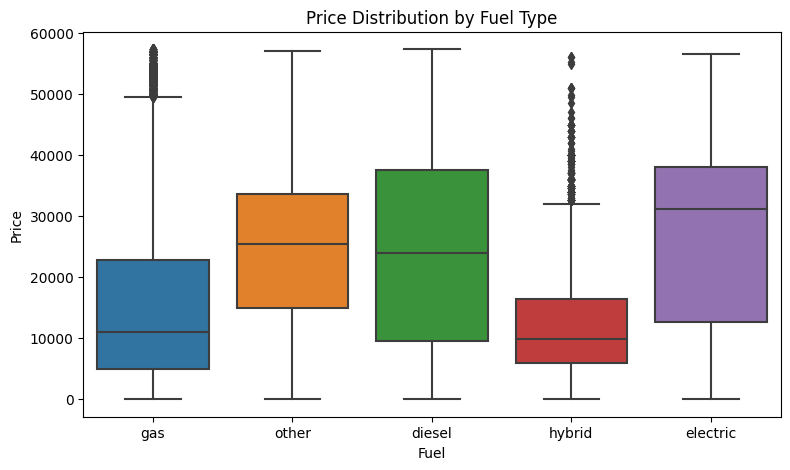

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='fuel', y='price')
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel')
plt.ylabel('Price')
plt.show()

**5.9 Price Distribution by Vehicle Type**

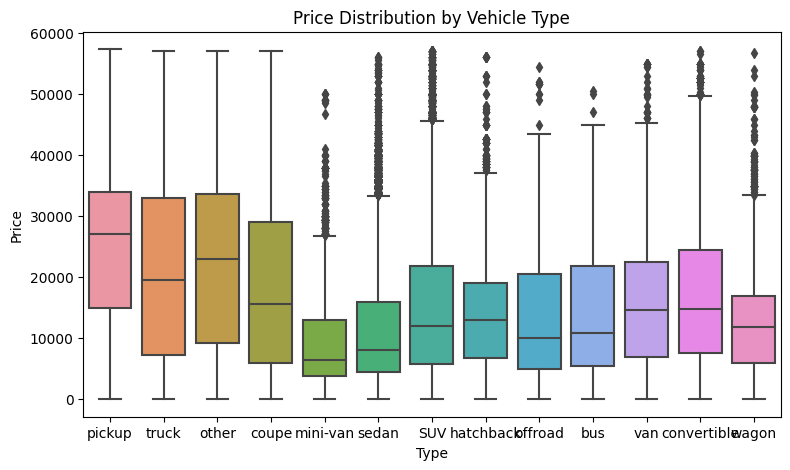

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='type', y='price')
plt.title('Price Distribution by Vehicle Type')
plt.xlabel('Type')
plt.ylabel('Price')
plt.show()

**5.10 Price distribution by transmission type**

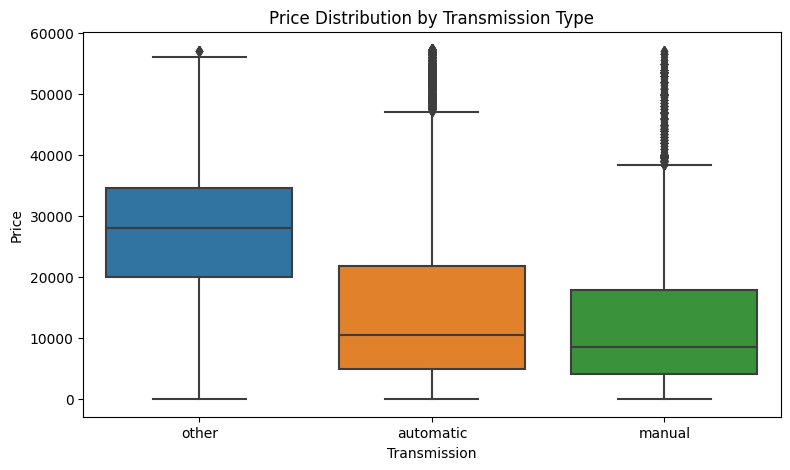

In [ ]:
plt.figure(figsize=(9, 5))
sns.boxplot(data=df, x='transmission', y='price')
plt.title('Price Distribution by Transmission Type')
plt.xlabel('Transmission')
plt.ylabel('Price')
plt.show()

5.11 Price distribution by description words number

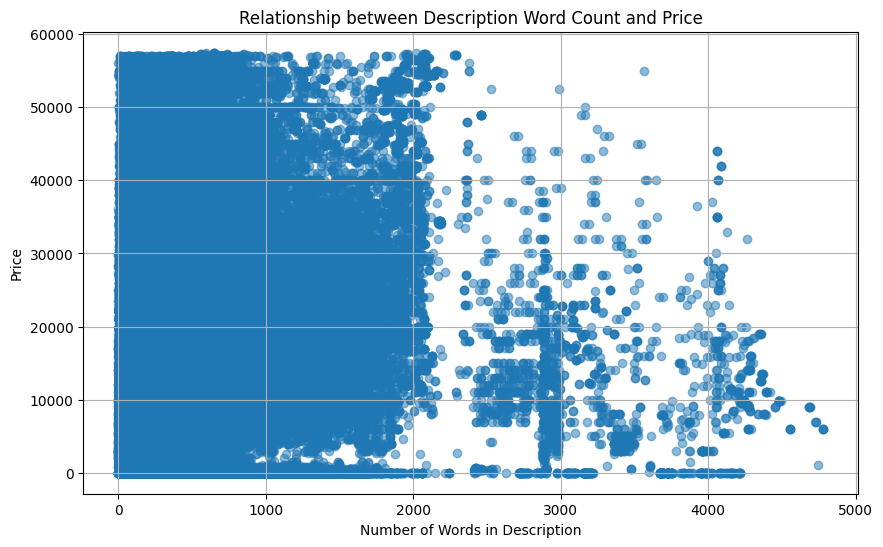

In [ ]:

plt.figure(figsize=(10, 6))
plt.scatter(df['description_word_count'], df['price'], alpha=0.5)
plt.title('Relationship between Description Word Count and Price')
plt.xlabel('Number of Words in Description')
plt.ylabel('Price')
plt.grid(True)
plt.show()


# 6. Data Modeling

In [ ]:
df.columns

Index(['Listing Price', 'Manufacturer', 'Model', 'Condition',
       'Number of Cylinders', 'Type of Fuel', 'Mileage', 'Legal status',
       'Type of Transmission', 'Type of Drivetrain', 'Type of vehicle body',
       'Color', 'image_url', 'State located', 'Latitude Coordinate',
       'Longitude Coordinate', 'Posted Date', 'Car Age',
       'Description word count'],
      dtype='object')

In [ ]:
df.columns = ['Listing Price','Manufacturer', 'Model','Condition', 'Number of Cylinders', 'Type of Fuel',
              'Mileage', 'Legal status', 'Type of Transmission', 'Type of Drivetrain','Type of vehicle body',
              'Color', 'image_url','State located', 'Latitude Coordinate','Longitude Coordinate',
              'Posted Date', 'Car Age','Description word count']

In [ ]:
# Selecting features for the model
numerical_features = df[['Mileage', 'Latitude Coordinate','Longitude Coordinate', 'Posted Date', 'Car Age']]
Cagetories = df[['Manufacturer', 'Model','Condition', 'Number of Cylinders', 'Type of Fuel',
               'Legal status', 'Type of Transmission', 'Type of Drivetrain','Type of vehicle body',
              'Color','State located']]
# Encoding categorical variables
Cagetories_encoded = pd.get_dummies(Cagetories, drop_first=True)
X = pd.concat([numerical_features, Cagetories_encoded], axis=1)
y = df['Listing Price']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using statsmodels for linear regression
X_train_sm = sm.add_constant(X_train)  # adding a constant

In [ ]:
df['Posted Date'] = pd.to_datetime(df['Posted Date']).astype('int')

**6.1 Decision Tree Regressor**

In [ ]:
# Decision Tree Regressor
dtree = DecisionTreeRegressor(random_state=42)
dtree.fit(X_train, y_train)
y_pred_dtree = dtree.predict(X_test)

**6.2 Random Forest Regressor**

In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)

In [ ]:
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
y_pred_rf = rf.predict(X_test)

# 7. Evaluating the models

**a) Using r square, MSE, MAE metrics to evaluate the models**.



In [ ]:
#Using r square, MSE, MAE metrics to evaluate.
# Evaluate the models
dtree_r2 = r2_score(y_test, y_pred_dtree)
rf_r2 = r2_score(y_test, y_pred_rf)

dtree_mse = mean_squared_error(y_test, y_pred_dtree)
rf_mse = mean_squared_error(y_test, y_pred_rf)

dtree_mae = mean_absolute_error(y_test, y_pred_dtree)
rf_mae = mean_absolute_error(y_test, y_pred_rf)

evaluation_data = {
    'Decision Tree': [dtree_r2, dtree_mse, dtree_mae],
    'Random Forest': [rf_r2, rf_mse, rf_mae]
}

evaluation_df = pd.DataFrame(evaluation_data, index=['R2', 'MSE', 'MAE'])
evaluation_df

,Decision Tree,Random Forest
R2,7.385227e-01,8.634582e-01
MSE,4.517909e+07,2.359225e+07
MAE,2.906254e+03,2.437365e+03


Based on the performance, the Random Forest model performs better:

Highest R² (Coefficient of Determination): The Random Forest model has the highest R² value, which means it explains the most variance in the vehicle prices out of the three models. A higher R² value indicates a model that better fits the data.

Lowest MSE (Mean Squared Error): This model has the lowest MSE, which means that on average, the squared difference between the predicted and actual prices is the smallest. Lower MSE values are indicative of a model with better accuracy.

Lowest MAE (Mean Absolute Error): The Random Forest also has the lowest MAE, suggesting that the average absolute difference between the predicted and actual prices is the smallest with this model. This indicates that the Random Forest model has better prediction accuracy on an absolute scale.

Why might the Random Forest model perform the best?

Handling Non-Linearity: Random Forest can model complex, non-linear relationships that linear models cannot.

Reducing Overfitting: By averaging multiple decision trees, Random Forest reduces the risk of overfitting, which can be a problem with a single decision tree.

Variable Interactions: Random Forest can capture interactions between different features better than linear models.

# 8. Plot the top 8 siginificant factors impacting pricing

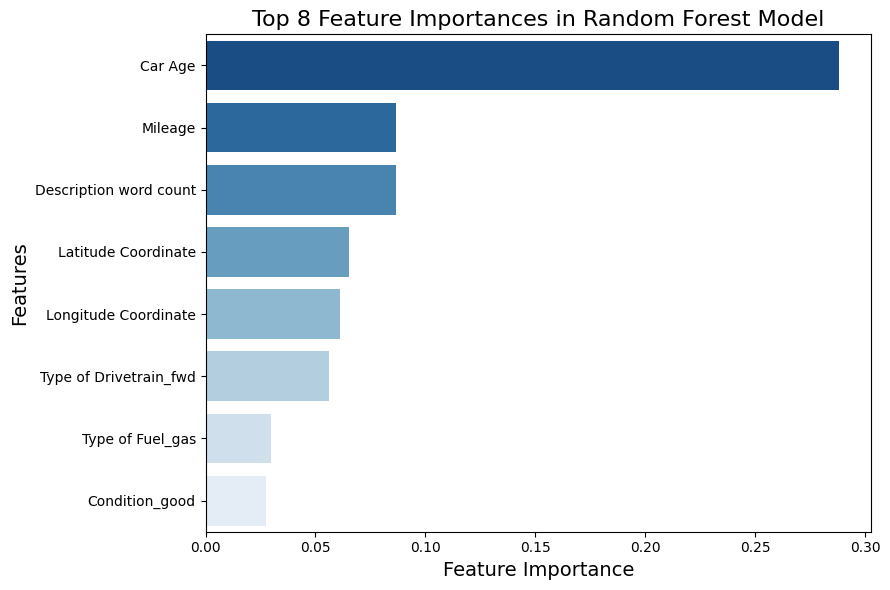

In [ ]:
def plot_improved_feature_importances(importances, feature_names, model_name, top_n=8):
    # Sort the importances and feature names in descending order
    sorted_indices = importances.argsort()[::-1][:top_n]
    sorted_importances = importances[sorted_indices]
    sorted_feature_names = feature_names[sorted_indices]

    # Create a color palette that has darker colors for higher values
    palette = sns.color_palette("Blues", n_colors=top_n)
    palette.reverse()
 # Darker colors for higher importance features

    # Increase the figure size
    plt.figure(figsize=(9, 6))
    # Create a barplot with the sorted importances and a reversed color palette
    sns.barplot(x=sorted_importances, y=sorted_feature_names, palette=palette)

    # Label formatting for better readability
    plt.xlabel('Feature Importance', fontsize=14)
    plt.ylabel('Features', fontsize=14)
    plt.title(f'Top {top_n} Feature Importances in {model_name} Model', fontsize=16)
    plt.tight_layout()
    plt.show()

# Assuming rf is your trained RandomForest model and X_train is your training dataset
# You'll need to replace X_train.columns with your actual feature names if it's not a Pandas DataFrame
plot_improved_feature_importances(rf.feature_importances_, X_train.columns, 'Random Forest', top_n=8)

For Owners/Sellers: Price setting Owners can use the model's insights to set competitive listing prices that reflect the true market value of their vehicles. Understanding the weight of factors like car age and mileage can help them price their vehicles in a way that is attractive to buyers but still maximizes their return.

For Buyers: Negotiation Strategy

Buyers can use the model's insights to inform their negotiation strategies. For example, if a car has high mileage or is an older model but is listed at a high price, buyers could use this data to argue for a lower price.

For Businesses: Listing Price Analysis

For Dealerships: They can use the model to set fair listing prices on their inventory, based on the factors that significantly affect car valuation. By doing so, they can improve the turnover rate of their inventory by pricing cars to market expectations.

## 9. Apply the Model to the Real World Situation!

**9.1 Adding My car information to the first row of the dataset.**

In [ ]:
My_Car = {
    'Listing Price': '25000',
    'Manufacturer': 'bmw',
    'Model': 'others',
    'Condition': 'excellent',
    'Number of Cylinders': 4,
    'Type of Fuel': 'Gas',
    'Mileage': '57000',
    'Legal status': 'clean',
    'Type of Transmission': 'automatic',
    'Type of Drivetrain': '4wd',
    'Type of vehicle body': 'SUV',
    'Color': 'black',
    'State located': 'wa',
    'Latitude Coordinate': '47.6061',
    'Longitude Coordinate': '122.3328',
    'Posted Date': '2023-11-29',
    'Car Age': 7
}

In [ ]:
df.loc[0] = My_Car

In [ ]:
df.columns = ['Listing Price','Manufacturer', 'Model','Condition', 'Number of Cylinders', 'Type of Fuel',
              'Mileage', 'Legal status', 'Type of Transmission', 'Type of Drivetrain','Type of vehicle body',
              'Color', 'image_url','State located', 'Latitude Coordinate','Longitude Coordinate',
              'Posted Date', 'Car Age','Description word count']

In [ ]:
df['Posted Date'] = pd.to_datetime(df['Posted Date']).astype('int')

Now, we can see my car information at first row

In [ ]:
df.head()

,Listing Price,Manufacturer,Model,Condition,Number of Cylinders,Type of Fuel,Mileage,Legal status,Type of Transmission,Type of Drivetrain,Type of vehicle body,Color,image_url,State located,Latitude Coordinate,Longitude Coordinate,Posted Date,Car Age,Description word count
27,33590,gmc,others,good,8 cylinders,gas,57923,clean,other,missing,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.59,-85.48,1620149478000000000,7,681.0
28,22590,chevrolet,silverado 1500,good,8 cylinders,gas,71229,clean,other,missing,pickup,blue,https://images.craigslist.org/00R0R_lwWjXSEWNa...,al,32.59,-85.48,1620149468000000000,11,692.0
29,39590,chevrolet,others,good,8 cylinders,gas,19160,clean,other,missing,pickup,red,https://images.craigslist.org/01212_jjirIWa0y0...,al,32.59,-85.48,1620149485000000000,1,690.0
30,30990,toyota,others,good,8 cylinders,gas,41124,clean,other,missing,pickup,red,https://images.craigslist.org/00x0x_1y9kIOzGCF...,al,32.59,-85.48,1620142891000000000,4,710.0
31,15000,ford,others,excellent,6 cylinders,gas,128000,clean,automatic,rwd,truck,black,https://images.craigslist.org/00404_l4loxHvdQe...,al,32.592,-85.5189,1620068523000000000,8,12.0


9.2. Encoding the categories columns

In [ ]:
# Selecting features for the model
numerical_features = df[['Mileage', 'Latitude Coordinate','Longitude Coordinate', 'Posted Date', 'Car Age']]
Cagetories = df[['Manufacturer', 'Model','Condition', 'Number of Cylinders', 'Type of Fuel',
               'Legal status', 'Type of Transmission', 'Type of Drivetrain','Type of vehicle body',
              'Color','State located']]

# Encoding categorical variables
Cagetories_encoded = pd.get_dummies(Cagetories, drop_first=True)

X = pd.concat([numerical_features, Cagetories_encoded], axis=1)
y = df['Listing Price']

In [ ]:
X.head()

,Mileage,Latitude Coordinate,Longitude Coordinate,Posted Date,Car Age,Manufacturer_audi,Manufacturer_bmw,Manufacturer_cadillac,Manufacturer_chevrolet,Manufacturer_chrysler,...,State located_sd,State located_tn,State located_tx,State located_ut,State located_va,State located_vt,State located_wa,State located_wi,State located_wv,State located_wy
27,57923,32.59,-85.48,1620149478000000000,7,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
28,71229,32.59,-85.48,1620149468000000000,11,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
29,19160,32.59,-85.48,1620149485000000000,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
30,41124,32.59,-85.48,1620142891000000000,4,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31,128000,32.592,-85.5189,1620068523000000000,8,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


9.3. After encoding, we take out my car data which locate at the first row

In [ ]:
Mycar = X.loc[0]
X = X.iloc[1:].reset_index(drop=True)
y = y.iloc[1:].reset_index(drop=True)

In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
Mycar = pd.DataFrame(Mycar)

In [ ]:
Mycar_predicted_price = rf.predict(Mycar.transpose())


**Surprise! Got my car's listing price!**

In [ ]:
print(f'Your car Predicted listing price is ${Mycar_predicted_price[0]}')

Your car Predicted listing price is $18409.09
